<>:44: SyntaxWarning: invalid escape sequence '\o'
<>:44: SyntaxWarning: invalid escape sequence '\o'
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_3813/1105477197.py:44: SyntaxWarning: invalid escape sequence '\o'
  plt.title('Edades para IMF Salpeter $\\alpha$ = 2.35 y $M_{up}$=100 $M_{\odot}$')
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_3813/1105477197.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  starburst_data = pd.read_csv('txt/SB99.dat', delim_whitespace=True, header=None)


0     3.878728e+06
1     4.202966e+06
2     4.532236e+06
3     5.936280e+06
4     2.729769e+06
5     3.336274e+06
6     4.743825e+06
7     2.872207e+06
8     3.658933e+06
9     4.568526e+06
10    4.931174e+06
11    5.026674e+06
Name: Age_Solid, dtype: float64


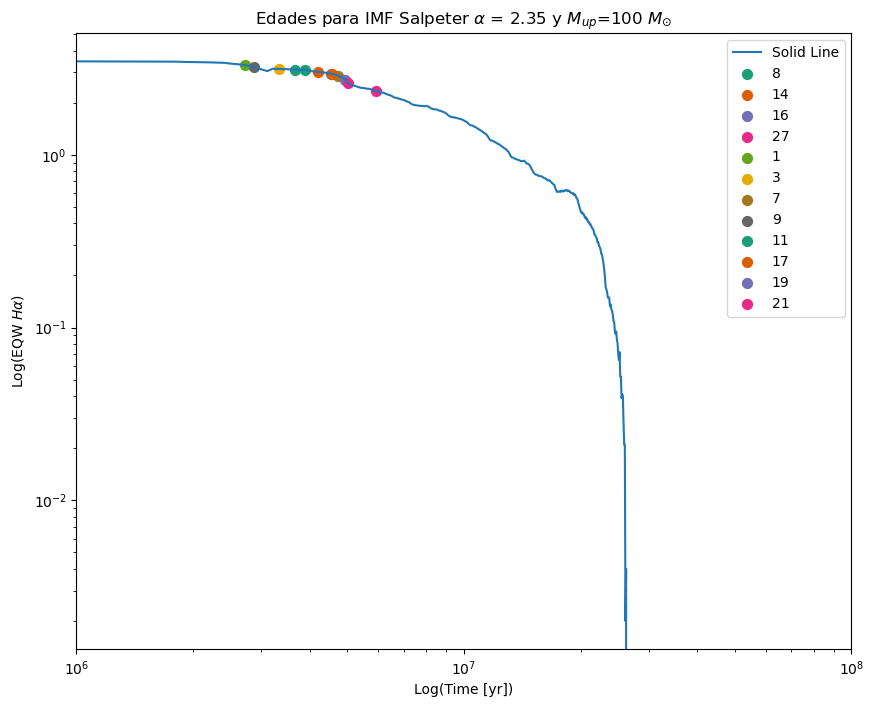

In [12]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import seaborn as sns

# Paso 1: Cargar los datos de StarBurst99 sin nombres de columnas
starburst_data = pd.read_csv('txt/SB99.dat', delim_whitespace=True, header=None)

# Asignar nombres a las columnas
starburst_data.columns = ['Time', 'Solid', 'LongDashed', 'ShortDashed']
interpolate_solid = interp1d(starburst_data['Solid'], starburst_data['Time'])

eqw_data = pd.read_csv('txt/measurement_emission_lines_mask2.tsv', delimiter='\t')
eqw_data = eqw_data.drop(index=[12,13,14,15,16])

eqw_data['Age_Solid'] = interpolate_solid(np.log10(eqw_data['H_ALPHA_EQW'].tolist()))
print(eqw_data['Age_Solid'])

# Obtener una paleta de colores con 8 colores diferentes
#palette = sns.color_palette("Dark2", n_colors=8)
#color_map = {id: color for id, color in zip(eqw_data['ID'].unique(), palette)}

# Obtener todos los IDs únicos en eqw_data para asegurar que color_map esté actualizado
unique_ids = eqw_data['ID'].unique()
palette = sns.color_palette("Dark2", n_colors=len(unique_ids))
color_map = {id: color for id, color in zip(unique_ids, palette)}

plt.figure(figsize=(10, 8))

# Graficar los datos de StarBurst99
plt.plot(starburst_data['Time'], starburst_data['Solid'], '-', label='Solid Line')

# Graficar los puntos con diferentes colores según el ID
for id in eqw_data['ID'].unique():
    subset = eqw_data[eqw_data['ID'] == id]
    plt.scatter(subset['Age_Solid'], np.log10(subset['H_ALPHA_EQW']), color=color_map[id], label=f'{id}', s=50)

plt.xscale('log')
plt.yscale('log')
plt.xlim(10**6,10**8)
plt.xlabel('Log(Time [yr])')
plt.ylabel('Log(EQW $H\\alpha$)')
plt.title('Edades para IMF Salpeter $\\alpha$ = 2.35 y $M_{up}$=100 $M_{\odot}$')
plt.legend()
plt.show()


<>:44: SyntaxWarning: invalid escape sequence '\o'
<>:44: SyntaxWarning: invalid escape sequence '\o'
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_3813/254707115.py:44: SyntaxWarning: invalid escape sequence '\o'
  plt.title('Edades para IMF $\\alpha$ = 3.30 y $M_{up}$=100 $M_{\odot}$')
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_3813/254707115.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  starburst_data = pd.read_csv('txt/SB99.dat', delim_whitespace=True, header=None)


0     2.723091e+06
1     2.991122e+06
2     3.821689e+06
3     5.941243e+06
4     7.205322e+06
5     2.480551e+06
6     4.206773e+06
7     3.400489e+06
8     2.794803e+06
9     3.881567e+06
10    4.813036e+06
11    4.985076e+06
Name: Age_LongDashed, dtype: float64


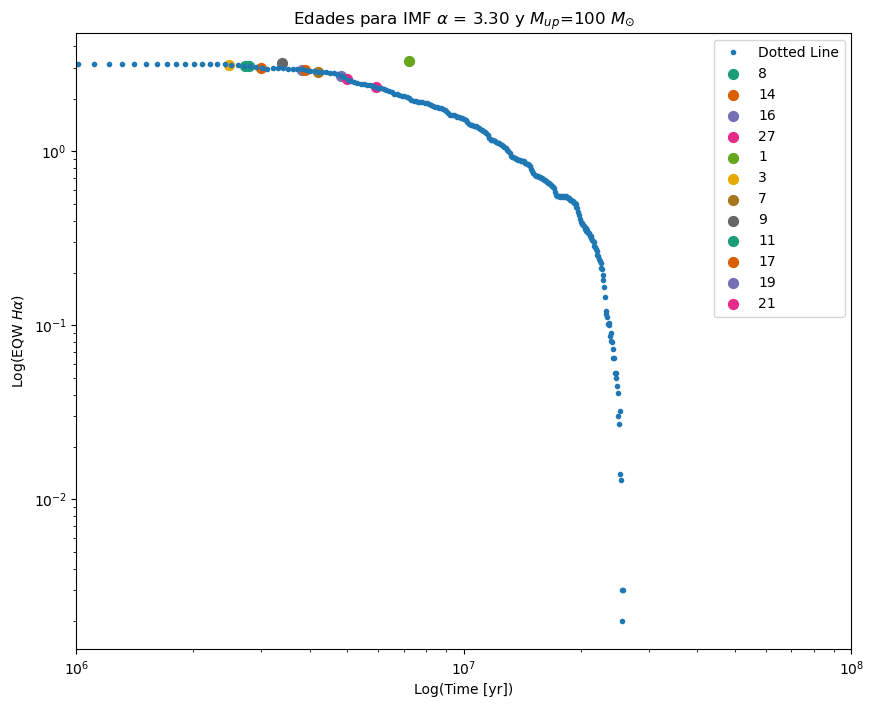

In [16]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import seaborn as sns

# Paso 1: Cargar los datos de StarBurst99 sin nombres de columnas
starburst_data = pd.read_csv('txt/SB99.dat', delim_whitespace=True, header=None)

# Asignar nombres a las columnas
starburst_data.columns = ['Time', 'Solid', 'LongDashed', 'ShortDashed']
interpolate_solid = interp1d(starburst_data['LongDashed'], starburst_data['Time'], fill_value='extrapolate')

eqw_data = pd.read_csv('txt/measurement_emission_lines_mask2.tsv', delimiter='\t')
eqw_data = eqw_data.drop(index=[12,13,14,15,16])

eqw_data['Age_LongDashed'] = interpolate_solid(np.log10(eqw_data['H_ALPHA_EQW'].tolist()))
print(eqw_data['Age_LongDashed'])

# Obtener una paleta de colores con 8 colores diferentes
#palette = sns.color_palette("Dark2", n_colors=8)
#color_map = {id: color for id, color in zip(eqw_data['ID'].unique(), palette)}

# Obtener todos los IDs únicos en eqw_data para asegurar que color_map esté actualizado
unique_ids = eqw_data['ID'].unique()
palette = sns.color_palette("Dark2", n_colors=len(unique_ids))
color_map = {id: color for id, color in zip(unique_ids, palette)}

plt.figure(figsize=(10, 8))

# Graficar los datos de StarBurst99
plt.plot(starburst_data['Time'], starburst_data['LongDashed'], '.', label='Dotted Line')

# Graficar los puntos con diferentes colores según el ID
for id in eqw_data['ID'].unique():
    subset = eqw_data[eqw_data['ID'] == id]
    plt.scatter(subset['Age_LongDashed'], np.log10(subset['H_ALPHA_EQW']), color=color_map[id], label=f'{id}', s=50)

plt.xscale('log')
plt.yscale('log')
plt.xlim(10**6,10**8)
plt.xlabel('Log(Time [yr])')
plt.ylabel('Log(EQW $H\\alpha$)')
plt.title('Edades para IMF $\\alpha$ = 3.30 y $M_{up}$=100 $M_{\odot}$')
plt.legend()
plt.show()

<>:44: SyntaxWarning: invalid escape sequence '\o'
<>:44: SyntaxWarning: invalid escape sequence '\o'
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_3813/3719497508.py:44: SyntaxWarning: invalid escape sequence '\o'
  plt.title('Edades para IMF Salpeter $\\alpha$ = 2.35 y $M_{up}$=30 $M_{\odot}$')
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_3813/3719497508.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  starburst_data = pd.read_csv('txt/SB99.dat', delim_whitespace=True, header=None)


0     2.474604e+06
1     4.681338e+06
2     5.721126e+06
3     6.737446e+06
4     4.928193e+07
5     8.370626e+05
6     6.020709e+06
7     2.645293e+07
8     3.701498e+06
9     5.761045e+06
10    6.416281e+06
11    6.547987e+06
Name: Age_ShortDashed, dtype: float64


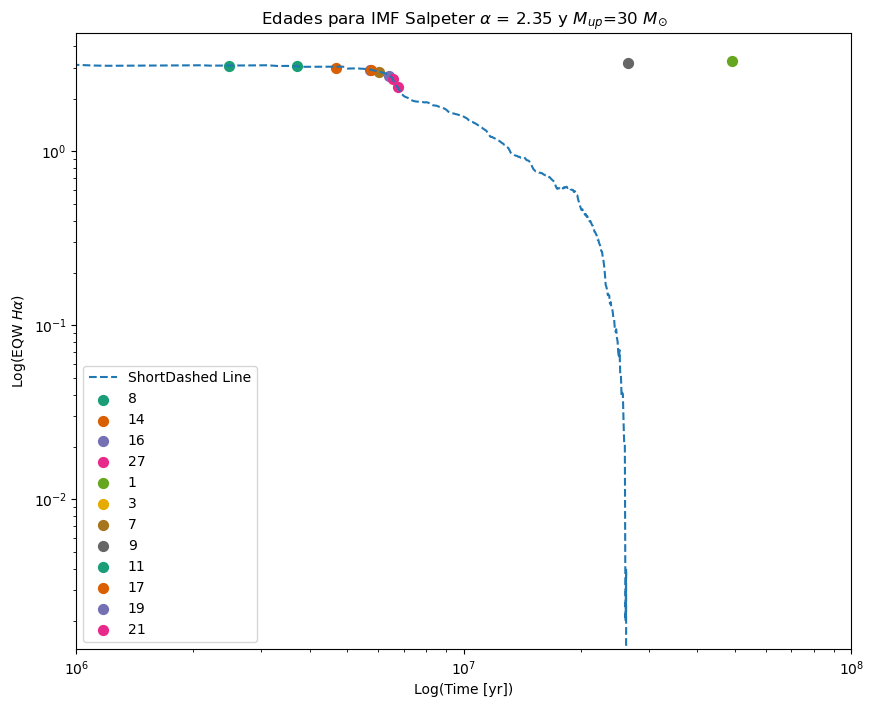

In [15]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import seaborn as sns

# Paso 1: Cargar los datos de StarBurst99 sin nombres de columnas
starburst_data = pd.read_csv('txt/SB99.dat', delim_whitespace=True, header=None)

# Asignar nombres a las columnas
starburst_data.columns = ['Time', 'Solid', 'LongDashed', 'ShortDashed']
interpolate_solid = interp1d(starburst_data['ShortDashed'], starburst_data['Time'], fill_value='extrapolate')

eqw_data = pd.read_csv('txt/measurement_emission_lines_mask2.tsv', delimiter='\t')
eqw_data = eqw_data.drop(index=[12,13,14,15,16])

eqw_data['Age_ShortDashed'] = interpolate_solid(np.log10(eqw_data['H_ALPHA_EQW'].tolist()))
print(eqw_data['Age_ShortDashed'])

# Obtener una paleta de colores con 8 colores diferentes
#palette = sns.color_palette("Dark2", n_colors=8)
#color_map = {id: color for id, color in zip(eqw_data['ID'].unique(), palette)}

# Obtener todos los IDs únicos en eqw_data para asegurar que color_map esté actualizado
unique_ids = eqw_data['ID'].unique()
palette = sns.color_palette("Dark2", n_colors=len(unique_ids))
color_map = {id: color for id, color in zip(unique_ids, palette)}

plt.figure(figsize=(10, 8))

# Graficar los datos de StarBurst99
plt.plot(starburst_data['Time'], starburst_data['ShortDashed'], '--', label='ShortDashed Line')

# Graficar los puntos con diferentes colores según el ID
for id in eqw_data['ID'].unique():
    subset = eqw_data[eqw_data['ID'] == id]
    plt.scatter(subset['Age_ShortDashed'], np.log10(subset['H_ALPHA_EQW']), color=color_map[id], label=f'{id}', s=50)

plt.xscale('log')
plt.yscale('log')
plt.xlim(10**6,10**8)
plt.xlabel('Log(Time [yr])')
plt.ylabel('Log(EQW $H\\alpha$)')
plt.title('Edades para IMF Salpeter $\\alpha$ = 2.35 y $M_{up}$=30 $M_{\odot}$')
plt.legend()
plt.show()

Scarano+2008



cos($\theta$) = $\dfrac{-(\alpha-\alpha_0)sin(\phi)cos(\delta) + (\delta - \delta_0)cos(\phi)}{r}$

sin($\theta$) = $\dfrac{-(\alpha-\alpha_0)cos(\phi)cos(\delta) - (\delta - \delta_0)sin(\phi)}{r cos(i)}$


$\alpha_0, \delta_0$ : coordenadas centrales de la galaxia (kinematic center)

$\alpha, \delta$ : coordenadas de las regiones SF

$\phi$ : ángulo de posición de la galaxia (position angle of the receding semi-major axis)

$\theta$ : ángulo azimutal (relacionado con las coordenadas polares r,$\theta$)

i : inclinación de la galaxia (inclination between the normal to the plane of the galaxy and the line-of-sight)

r : posición de la región de formación estelar desde el centro de la galaxia

r & $\theta$ are the polar coordinates inside the plane of the galactic disk





In [ ]:
#Cálculo de distancia deproyectada desde el centro de la galaxia hasta las regiones SF


In [ ]:
import numpy as np

# Datos de entrada
alpha_0, delta_0 = 0.0, 0.0  # Coordenadas del centro en grados
alpha = [10.0, 15.0]  # Coordenadas de las regiones en grados
delta = [20.0, 25.0]  # Coordenadas de las regiones en grados
phi = 30.0  # Ángulo de posición en grados
i = 60.0  # Inclinación en grados
D = 4200  # Distancia a la galaxia en kpc (4.2 Mpc)

# Convertir a radianes
alpha_0_rad = np.radians(alpha_0)
delta_0_rad = np.radians(delta_0)
alpha_rad = np.radians(alpha)
delta_rad = np.radians(delta)
phi_rad = np.radians(phi)
i_rad = np.radians(i)

# Calcular r para cada región
for a, d in zip(alpha_rad, delta_rad):
    # Calcular los componentes x e y
    x = -(a - alpha_0_rad) * np.sin(phi_rad) * np.cos(d) + (d - delta_0_rad) * np.cos(phi_rad)
    y = -(a - alpha_0_rad) * np.cos(phi_rad) * np.cos(d) - (d - delta_0_rad) * np.sin(phi_rad)

    # Calcular el ángulo theta
    theta = np.arctan2(y, x)  # en radianes

    # Calcular la distancia proyectada en kpc
    r_kpc = D * np.tan(theta)

    # Imprimir el resultado
    print(f'Distancia proyectada en kpc: {r_kpc}')
